In [1]:
seed = 42  # for reproducibility

import pickle
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["axes.grid"] = False
%matplotlib inline

import os
import sys
from pathlib import Path
import torch
import torch.nn.functional as F
from torchvision.utils import make_grid, save_image
from sklearn.metrics import plot_confusion_matrix
torch.manual_seed(seed)
sys.path.append(str(Path().absolute().parent))
plt.style.use('seaborn')

In [2]:
exp_path = Path().absolute().parent.parent.joinpath('src/experiments/0081_5centers_1epr30fr_BALANCED_DenseNet_Median_LateralityFixThenFlipAgain')
clog_path = 'experiments/0082_5centers_1epr30fr_BALANCED_DenseNet_Median_LateralityFixThenFlipAgainClient_Logs'
stge_path = Path().absolute().parent.parent.joinpath(f'src/{clog_path}/client_logs/stge')
jarv_path = Path().absolute().parent.parent.joinpath(f'src/{clog_path}/client_logs/jarv')
bcdr_path = Path().absolute().parent.parent.joinpath(f'src/{clog_path}/client_logs/bcdr')
inbreast_path = Path().absolute().parent.parent.joinpath(f'src/{clog_path}/client_logs/inbreast')
cmmd_path = Path().absolute().parent.parent.joinpath(f'src/{clog_path}/client_logs/cmmd')

In [3]:
pickle_file = 'log.pkl'
with open(exp_path.joinpath(pickle_file), 'rb') as handle:
    aggregated_metrics = pickle.load(handle)
    
with open(stge_path.joinpath(pickle_file), 'rb') as handle:
    stge_metrics = pickle.load(handle)
with open(jarv_path.joinpath(pickle_file), 'rb') as handle:
    jarv_metrics = pickle.load(handle)
    
with open(inbreast_path.joinpath(pickle_file), 'rb') as handle:
    inbreast_metrics = pickle.load(handle)
    
with open(bcdr_path.joinpath(pickle_file), 'rb') as handle:
    bcdr_metrics = pickle.load(handle)
    
with open(cmmd_path.joinpath(pickle_file), 'rb') as handle:
    cmmd_metrics = pickle.load(handle)

In [4]:
cmmd_metrics.keys()

dict_keys(['local_loss', 'GMLD_val_loss', 'LMLD_val_loss', 'local_accuracy', 'local_sensitivity', 'local_specificity', 'local_val_predictions', 'GMLD_accuracy', 'GMLD_true_positives', 'GMLD_false_positives', 'GMLD_false_negatives', 'GMLD_true_negatives', 'LMLD_train_accuracy', 'LMLD_val_accuracy', 'LMLD_train_true_positives', 'LMLD_train_false_positives', 'LMLD_train_false_negatives', 'LMLD_train_true_negatives', 'LMLD_val_true_positives', 'LMLD_val_false_positives', 'LMLD_val_false_negatives', 'LMLD_val_true_negatives'])

# Accuracies, 5 folds, 100 epochs. Average so that you get 1,100 np array (averaged across folds)

In [5]:
aggregated_metrics.keys()

dict_keys(['accuracies_aggregated', 'total_val_loss', 'time_spent'])

In [6]:
aggregated_metrics['accuracies_aggregated']

[0.5448848668794913,
 0.5799488302664534,
 0.6084056427225522,
 0.62505148464453,
 0.6177684220700526,
 0.6211954994082,
 0.6419563421421428,
 0.6511340900440448,
 0.6675003584731909,
 0.6486276530999169,
 0.6652012777807393,
 0.6871649231592799,
 0.6680422907078496,
 0.6891571077404057,
 0.6842607124492119,
 0.6789619268028029,
 0.710505029518814,
 0.6897310087505926,
 0.6932251987290687,
 0.7091040293075623,
 0.6963764443311874,
 0.7285150804611916,
 0.7201652012397446,
 0.7179061458194017,
 0.7230850557342204,
 0.746405048697668,
 0.7369892217768783,
 0.7169468094106195,
 0.7346199782283694,
 0.7370158650545865]

In [7]:
inbreast_metrics['local_loss']

{0: [0.7010994553565979],
 1: [0.706693708896637],
 2: [0.7123802900314331],
 3: [0.6446498036384583],
 4: [0.7977308630943298],
 5: [0.7039971351623535],
 6: [0.7238603234291077],
 7: [0.6916322708129883],
 8: [0.7552489638328552],
 9: [0.5995263457298279],
 10: [0.5191293954849243],
 11: [0.6043969392776489],
 12: [0.6859652400016785],
 13: [0.6634916663169861],
 14: [0.9398369193077087],
 15: [0.7307854890823364],
 16: [0.7521653175354004],
 17: [0.5734900236129761],
 18: [0.7208130955696106],
 19: [0.6578404307365417],
 20: [0.5541106462478638],
 21: [0.7336153984069824],
 22: [0.6908039450645447],
 23: [0.4807462692260742],
 24: [0.41259709000587463],
 25: [0.4947507083415985],
 26: [0.6136186718940735],
 27: [0.48506662249565125],
 28: [0.4067578911781311],
 29: [0.609886109828949],
 30: []}

## Curve

In [8]:
[cmmd_metrics['local_loss'][i][0] for i in range(len(cmmd_metrics['local_loss'])-1)]

[1.200014352798462,
 0.5291804075241089,
 0.7914606332778931,
 0.9365453124046326,
 1.337363839149475,
 1.1136823892593384,
 0.6859437823295593,
 0.8548672199249268,
 0.9495818018913269,
 1.2808003425598145,
 1.0316972732543945,
 0.7928048372268677,
 0.8091787099838257,
 0.6005089282989502,
 0.8911069631576538,
 1.337856411933899,
 0.9719806909561157,
 1.0318639278411865,
 0.7279939651489258,
 0.9585919976234436,
 0.6727252006530762,
 1.0769069194793701,
 0.9627715349197388,
 0.949006199836731,
 0.7820980548858643,
 0.735671877861023,
 0.7946248054504395,
 1.0500390529632568,
 0.5915241837501526,
 0.3643285036087036]

In [9]:
cmmd_losses_local = np.array([cmmd_metrics['local_loss'][i][0] for i in range(len(cmmd_metrics['local_loss'])-1)])
inbreast_losses_local = np.array([inbreast_metrics['local_loss'][i][0] for i in range(len(inbreast_metrics['local_loss'])-1)])
stge_losses_local = np.array([stge_metrics['local_loss'][i][0] for i in range(len(stge_metrics['local_loss'])-1)])
jarv_losses_local = np.array([jarv_metrics['local_loss'][i][0] for i in range(len(jarv_metrics['local_loss'])-1)])
bcdr_losses_local = np.array([bcdr_metrics['local_loss'][i][0] for i in range(len(bcdr_metrics['local_loss'])-1)])
steps = range(len(cmmd_losses_local))

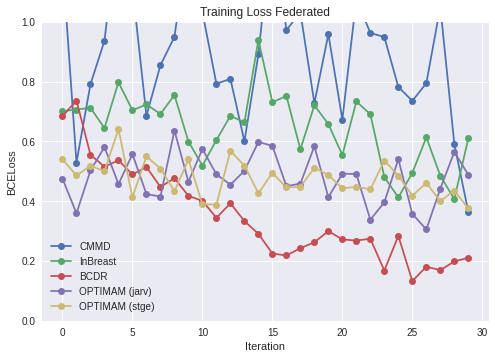

In [10]:
plt.plot(steps, cmmd_losses_local,'-o', label='CMMD')
plt.plot(steps, inbreast_losses_local,'-o', label='InBreast')
plt.plot(steps, bcdr_losses_local,'-o', label='BCDR')
plt.plot(steps, jarv_losses_local,'-o', label='OPTIMAM (jarv)')
plt.plot(steps, stge_losses_local,'-o', label='OPTIMAM (stge)')
plt.legend()
plt.xlabel('Iteration')
plt.ylim(0,1)
plt.ylabel('BCELoss')
plt.title('Training Loss Federated')
plt.savefig('./plots/train_loss_per_center_30EPR1FR_MEDIAN.png')

In [11]:
for i in range(len(cmmd_metrics['local_val_loss'])-1):
    print(i)

KeyError: 'local_val_loss'

In [12]:
[cmmd_metrics['local_val_loss'][i] for i in range(len(cmmd_metrics['local_val_loss'])-1)]

KeyError: 'local_val_loss'

In [ ]:
cmmd_losses_local = np.array([cmmd_metrics['local_val_loss'][i] for i in range(len(cmmd_metrics['local_val_loss'])-1)])
inbreast_losses_local = np.array([inbreast_metrics['local_val_loss'][i] for i in range(len(inbreast_metrics['local_val_loss'])-1)])
stge_losses_local = np.array([stge_metrics['local_val_loss'][i] for i in range(len(stge_metrics['local_val_loss'])-1)])
jarv_losses_local = np.array([jarv_metrics['local_val_loss'][i] for i in range(len(jarv_metrics['local_val_loss'])-1)])
bcdr_losses_local = np.array([bcdr_metrics['local_val_loss'][i] for i in range(len(bcdr_metrics['local_val_loss'])-1)])
steps = range(len(cmmd_losses_local))

In [ ]:
plt.plot(steps, cmmd_losses_local,'-o', label='CMMD')
plt.plot(steps, inbreast_losses_local,'-o', label='InBreast')
plt.plot(steps, bcdr_losses_local,'-o', label='BCDR')
plt.plot(steps, jarv_losses_local,'-o', label='OPTIMAM (jarv)')
plt.plot(steps, stge_losses_local,'-o', label='OPTIMAM (stge)')
plt.legend()
plt.xlabel('Iteration')
plt.ylim(0,1)
plt.ylabel('BCELoss')
plt.title('Validation Loss Federated')
plt.savefig('./plots/val_loss_per_center_30EPR1FR_MEDIAN_Laterality.png')

In [ ]:
plt.plot(steps, aggregated_metrics,'-o', label='aggregated')
plt.legend()
plt.xlabel('Iteration')
plt.ylim(0,1)
plt.ylabel('BCELoss')
plt.title('Training Each Center Isolation')
plt.savefig('./plots/sanity_check_success1EPR30FR.png')

In [14]:
cmmd_accuracy = [cmmd_metrics['GMLD_true_positives'][i] / (cmmd_metrics['GMLD_true_positives'][i] + cmmd_metrics['GMLD_false_negatives'][i]) for i in range(len(cmmd_metrics['GMLD_true_positives']))]
cmmd_sensitivity = [cmmd_metrics['GMLD_true_positives'][i] / (cmmd_metrics['GMLD_true_positives'][i] + cmmd_metrics['GMLD_false_negatives'][i]) for i in range(len(cmmd_metrics['GMLD_true_positives']))]
cmmd_specificity = [cmmd_metrics['GMLD_true_negatives'][i] / (cmmd_metrics['GMLD_true_negatives'][i] + cmmd_metrics['GMLD_false_positives'][i]) for i in range(len(cmmd_metrics['GMLD_true_negatives']))]
cmmd_f1 = [2 * cmmd_metrics['GMLD_true_positives'][i] / (2 * cmmd_metrics['GMLD_true_positives'][i] + cmmd_metrics['GMLD_false_positives'][i] + cmmd_metrics['GMLD_false_negatives'][i]) for i in range(len(cmmd_metrics['GMLD_true_positives']))]
# cmmd_AUC = [sklearn.metrics.roc_auc_score(cmmd_metrics['GMLD_labels'][i].detach().numpy(), cmmd_metrics['GMLD_predictions'][i].detach().numpy()) for i in range(len(cmmd_metrics['GMLD_true_positives']))]


In [16]:
stge_f1 = [2 * stge_metrics['GMLD_true_positives'][i] / (2 * stge_metrics['GMLD_true_positives'][i] + stge_metrics['GMLD_false_positives'][i] + stge_metrics['GMLD_false_negatives'][i]) for i in range(len(stge_metrics['GMLD_true_positives']))]
jarv_f1 = [2 * jarv_metrics['GMLD_true_positives'][i] / (2 * jarv_metrics['GMLD_true_positives'][i] + jarv_metrics['GMLD_false_positives'][i] + jarv_metrics['GMLD_false_negatives'][i]) for i in range(len(jarv_metrics['GMLD_true_positives']))]
bcdr_f1 = [2 * bcdr_metrics['GMLD_true_positives'][i] / (2 * bcdr_metrics['GMLD_true_positives'][i] + bcdr_metrics['GMLD_false_positives'][i] + bcdr_metrics['GMLD_false_negatives'][i]) for i in range(len(jarv_metrics['GMLD_true_positives']))]
inbreast_f1 = [2 * inbreast_metrics['GMLD_true_positives'][i] / (2 * inbreast_metrics['GMLD_true_positives'][i] + inbreast_metrics['GMLD_false_positives'][i] + inbreast_metrics['GMLD_false_negatives'][i]) for i in range(len(jarv_metrics['GMLD_true_positives']))]

In [20]:
all_true_positives = inbreast_metrics['GMLD_true_positives'] + cmmd_metrics['GMLD_true_positives'] + stge_metrics['GMLD_true_positives'] + jarv_metrics['GMLD_true_positives'] + bcdr_metrics['GMLD_true_positives']
all_false_positives = inbreast_metrics['GMLD_false_positives'] + cmmd_metrics['GMLD_false_positives'] + stge_metrics['GMLD_false_positives'] + jarv_metrics['GMLD_false_positives'] + bcdr_metrics['GMLD_false_positives']
all_false_negatives = inbreast_metrics['GMLD_false_negatives'] + cmmd_metrics['GMLD_false_negatives'] + stge_metrics['GMLD_false_negatives'] + jarv_metrics['GMLD_false_negatives'] + bcdr_metrics['GMLD_false_negatives']
all_f1 = [2 * all_true_positives[i] / (2 * all_true_positives[i] + all_false_positives[i] + all_false_negatives[i]) for i in range(len(all_true_positives))]


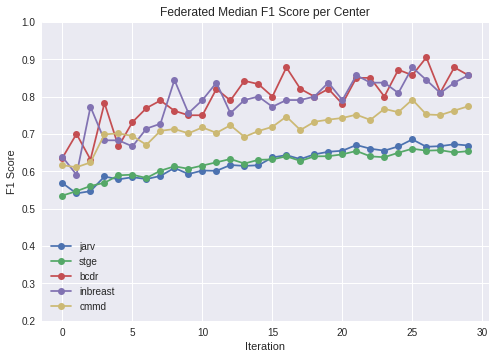

In [17]:
plt.plot(steps, jarv_f1,'-o', label='jarv')
plt.plot(steps, stge_f1,'-o', label='stge')
plt.plot(steps, bcdr_f1,'-o', label='bcdr')
plt.plot(steps, inbreast_f1,'-o', label='inbreast')
plt.plot(steps, cmmd_f1,'-o', label='cmmd')
plt.legend()
plt.xlabel('Iteration')
plt.ylim(0.2,1)
plt.ylabel('F1 Score')
plt.title('Federated Median F1 Score per Center')
plt.savefig('./plots/FMedian_F1_LateralityFlipAgainDense.png')

In [22]:
print(inbreast_f1[-1], cmmd_f1[-1], jarv_f1[-1], stge_f1[-1], bcdr_f1[-1], all_f1[-1]) 

0.8571428571428571 0.7740585774058577 0.6690464048954615 0.6540049545829892 0.8571428571428571 0.8571428571428571


In [ ]:
inbreast_accuracy = [inbreast_metrics['GMLD_true_positives'][i] / (inbreast_metrics['GMLD_true_positives'][i] + inbreast_metrics['GMLD_false_negatives'][i]) for i in range(len(inbreast_metrics['GMLD_true_positives']))]


In [ ]:
cmmd_accuracy